In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ts_matrix = np.load("TS_matrix.npy")
ts_matrix

array([[1.56514212, 1.90724335, 1.58179635, ..., 1.64948906, 1.46344609,
        1.58179635],
       [1.90724335, 2.74618691, 2.11856792, ..., 2.2417872 , 1.88423131,
        2.11856792],
       [1.58179635, 2.11856792, 1.72445708, ..., 1.80522242, 1.56593504,
        1.72445708],
       ...,
       [1.64948906, 2.2417872 , 1.80522242, ..., 1.89392481, 1.63224853,
        1.80522242],
       [1.46344609, 1.88423131, 1.56593504, ..., 1.63224853, 1.43410393,
        1.56593504],
       [1.58179635, 2.11856792, 1.72445708, ..., 1.80522242, 1.56593504,
        1.72445708]])

In [5]:
gr_matrix = np.load("GR_matrix.npy")
gr_matrix

array([[5.00000000e-01, 1.93316605e-03, 4.19194098e-03, ...,
        1.87117512e-02, 5.13832496e-03, 2.66517250e-02],
       [1.93316605e-03, 5.00000000e-01, 3.82532571e-03, ...,
        2.85627143e-03, 2.45620423e-03, 3.54255774e-03],
       [4.19194098e-03, 3.82532571e-03, 8.11165561e-01, ...,
        1.09857826e-01, 2.26525250e-04, 6.14441272e-03],
       ...,
       [1.87117512e-02, 2.85627143e-03, 1.09857826e-01, ...,
        9.11958500e-01, 1.97957169e-02, 9.57456658e-02],
       [5.13832496e-03, 2.45620423e-03, 2.26525250e-04, ...,
        1.97957169e-02, 7.73809360e-01, 3.60716646e-01],
       [2.66517250e-02, 3.54255774e-03, 6.14441272e-03, ...,
        9.57456658e-02, 3.60716646e-01, 1.11948173e+00]])

In [6]:
cs_matrix = np.load("CS_matrix.npy")
cs_matrix

array([[1.        , 0.09090909, 0.07526882, ..., 0.11267606, 0.07228916,
        0.05405405],
       [0.09090909, 1.        , 0.13157895, ..., 0.12068966, 0.08695652,
        0.06666667],
       [0.07526882, 0.13157895, 1.        , ..., 0.14814815, 0.10752688,
        0.06976744],
       ...,
       [0.11267606, 0.12068966, 0.14814815, ..., 1.        , 0.10810811,
        0.12698413],
       [0.07228916, 0.08695652, 0.10752688, ..., 0.10810811, 1.        ,
        0.05194805],
       [0.05405405, 0.06666667, 0.06976744, ..., 0.12698413, 0.05194805,
        1.        ]])

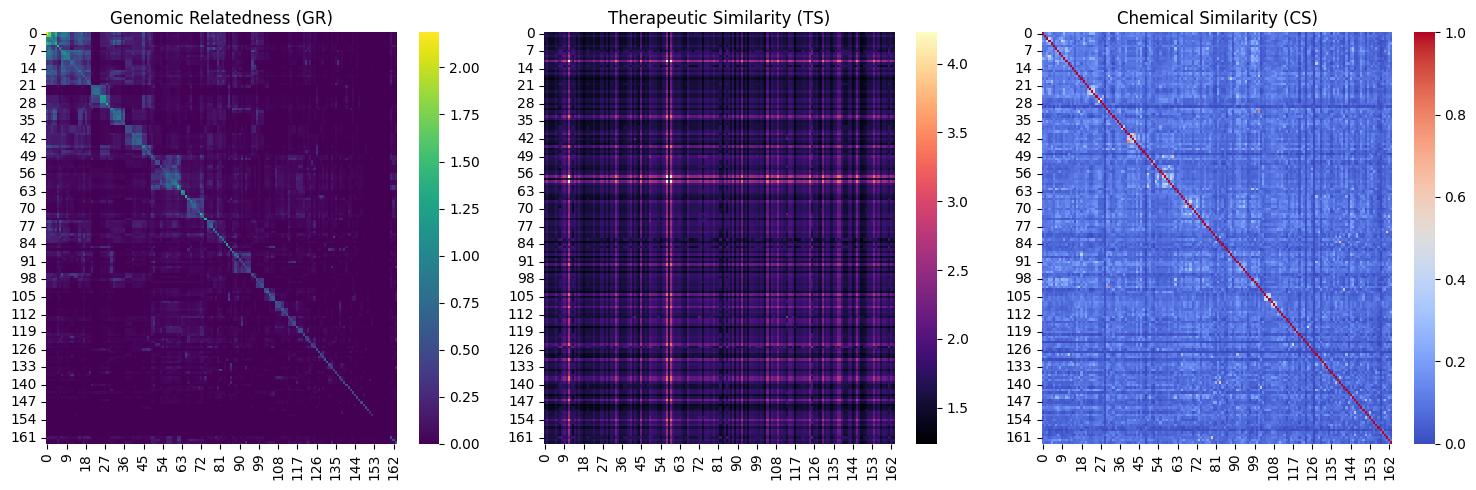

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

GR = gr_matrix
TS = ts_matrix
CS = cs_matrix

# Step 1: 聚类 GR 矩阵
linkage_matrix = linkage(GR, method='average')
dendro = dendrogram(linkage_matrix, no_plot=True)
order = leaves_list(linkage_matrix)

# Step 2: 重新排序矩阵
GR_sorted = GR[order][:, order]
TS_sorted = TS[order][:, order]
CS_sorted = CS[order][:, order]

# Step 3: 绘制热力图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(GR_sorted, ax=axs[0], cmap='viridis', cbar=True)
axs[0].set_title("Genomic Relatedness (GR)")

sns.heatmap(TS_sorted, ax=axs[1], cmap='magma', cbar=True)
axs[1].set_title("Therapeutic Similarity (TS)")

sns.heatmap(CS_sorted, ax=axs[2], cmap='coolwarm', cbar=True)
axs[2].set_title("Chemical Similarity (CS)")

plt.tight_layout()
plt.show()
